# 경기선행지수

관세청 수출입무역통계
https://tradedata.go.kr/cts/index.do
수출입통계>수출입 실적
데이터에서 총계부분 삭제

In [1]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("trade_20240115.csv")
data['time'] = pd.to_datetime(data['기간'], format='%Y-%m')
data = data.drop(['기간'], axis=1)
data = data.set_index('time')
data = data.sort_index()
data

,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
time,,,,,,,
2019-01-01,1,살아 있는 동물,2.1,155,49.9,2571,-2415
2019-01-01,2,육과 식용 설육(屑肉),4235.2,4623,144464.4,656518,-651895
2019-01-01,3,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,49502.0,144381,130006.2,509332,-364951
2019-01-01,4,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",2223.3,4944,25932.5,88130,-83186
2019-01-01,5,다른 류로 분류되지 않은 동물성 생산품,1633.8,6524,6709.0,33082,-26558
...,...,...,...,...,...,...,...
2023-12-01,94,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",14775.9,115630,69166.8,308512,-192882
2023-12-01,95,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,1955.0,48614,13244.2,206706,-158092
2023-12-01,96,잡품,2411.5,37686,11107.2,89628,-51942


In [2]:
#같은 HS코드끼리 월별 변화량

# Removing '수출 중량' and '수입 중량' columns
trimmed_data = data.drop(columns=['수출 중량', '수입 중량', '무역수지'])

# Calculating monthly changes in '수출 금액' and '수입 금액' for each HS code
trimmed_data['수출 금액 변화량'] = trimmed_data.groupby('HS코드')['수출 금액'].diff().fillna(0)
trimmed_data['수입 금액 변화량'] = trimmed_data.groupby('HS코드')['수입 금액'].diff().fillna(0)

# Setting '기간' as index
# trimmed_data.set_index('기간', inplace=True)

# Displaying the first few rows of the modified dataframe
trimmed_data

,HS코드,품목명,수출 금액,수입 금액,수출 금액 변화량,수입 금액 변화량
time,,,,,,
2019-01-01,1,살아 있는 동물,155,2571,0.0,0.0
2019-01-01,2,육과 식용 설육(屑肉),4623,656518,0.0,0.0
2019-01-01,3,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,144381,509332,0.0,0.0
2019-01-01,4,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4944,88130,0.0,0.0
2019-01-01,5,다른 류로 분류되지 않은 동물성 생산품,6524,33082,0.0,0.0
...,...,...,...,...,...,...
2023-12-01,94,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",115630,308512,-12362.0,-23008.0
2023-12-01,95,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,48614,206706,-5000.0,-11652.0
2023-12-01,96,잡품,37686,89628,-1853.0,-2899.0


In [3]:
# Calculating the percentage change in '수출 금액' for each HS code
trimmed_data['수출 금액 백분율 변화'] = trimmed_data.groupby('HS코드')['수출 금액'].pct_change().fillna(0)

# Initializing columns '보합', '증가' with 0
trimmed_data['보합'] = 0
trimmed_data['증가'] = 0
trimmed_data['감소'] = 0

# Applying conditions to set values in '보합' and '증가' columns
threshold = 0.0005  # 0.05%
trimmed_data.loc[trimmed_data['수출 금액 백분율 변화'].between(-threshold, threshold), '보합'] = 1
trimmed_data.loc[trimmed_data['수출 금액 백분율 변화'] > threshold, '증가'] = 1
trimmed_data.loc[trimmed_data['수출 금액 백분율 변화'] < -threshold, '감소'] = 1

# Displaying the first few rows of the modified dataframe
trimmed_data[['HS코드', '품목명', '수출 금액 백분율 변화', '보합', '증가', '감소']].head()

# Selecting only HS코드, 품목명, and 수출 금액 변화량 columns
export_change_data = trimmed_data[['HS코드', '품목명', '수출 금액', '수출 금액 변화량', '증가', '보합', '감소']]
export_change_data

,HS코드,품목명,수출 금액,수출 금액 변화량,증가,보합,감소
time,,,,,,,
2019-01-01,1,살아 있는 동물,155,0.0,0,1,0
2019-01-01,2,육과 식용 설육(屑肉),4623,0.0,0,1,0
2019-01-01,3,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,144381,0.0,0,1,0
2019-01-01,4,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4944,0.0,0,1,0
2019-01-01,5,다른 류로 분류되지 않은 동물성 생산품,6524,0.0,0,1,0
...,...,...,...,...,...,...,...
2023-12-01,94,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",115630,-12362.0,0,0,1
2023-12-01,95,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,48614,-5000.0,0,0,1
2023-12-01,96,잡품,37686,-1853.0,0,0,1


In [4]:
# Counting the number of items that are '증가' and '보합' for each month
monthly_counts = trimmed_data.groupby('time')[['증가', '보합', '감소']].sum()

# Counting the total number of distinct HS codes for each month
monthly_counts['전체'] = trimmed_data.groupby('time')['HS코드'].nunique()


# Displaying the table with monthly counts
monthly_counts

,증가,보합,감소,전체
time,,,,
2019-01-01,0,96,0,96
2019-02-01,18,1,77,96
2019-03-01,85,1,10,96
2019-04-01,58,2,36,96
2019-05-01,46,2,48,96
2019-06-01,27,1,68,96
2019-07-01,69,1,26,96
2019-08-01,24,1,71,96
2019-09-01,41,2,53,96


In [5]:
# Calculating the value ((증가 + 보합 * 0.5) / 전체) for each month
monthly_counts['지수'] = (monthly_counts['증가'] + monthly_counts['보합'] * 0.5) / monthly_counts['전체']

# Displaying the updated table with the '지수' column
monthly_counts

,증가,보합,감소,전체,지수
time,,,,,
2019-01-01,0,96,0,96,0.500000
2019-02-01,18,1,77,96,0.192708
2019-03-01,85,1,10,96,0.890625
2019-04-01,58,2,36,96,0.614583
2019-05-01,46,2,48,96,0.489583
2019-06-01,27,1,68,96,0.286458
2019-07-01,69,1,26,96,0.723958
2019-08-01,24,1,71,96,0.255208
2019-09-01,41,2,53,96,0.437500


In [6]:
# Calculating 3-month moving average for the '지수' column
monthly_counts['ma'] = monthly_counts['지수'].rolling(window=3).mean()
monthly_counts['ma6'] = monthly_counts['지수'].rolling(window=6).mean()

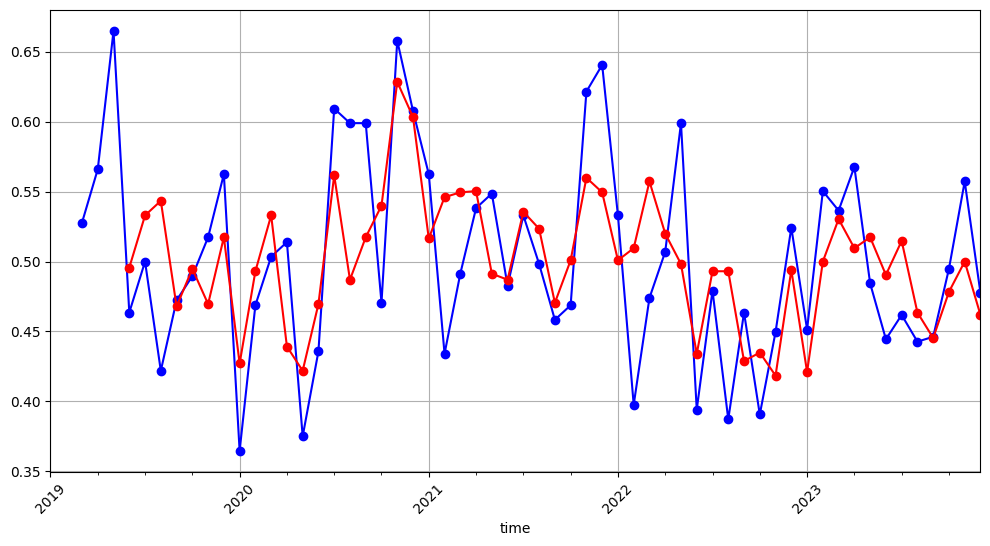

In [7]:
from matplotlib import pyplot as plt

# Plotting the '지수' values as a line graph
plt.figure(figsize=(12, 6))
monthly_counts['ma'].plot(kind='line', color='blue', marker='o')
monthly_counts['ma6'].plot(kind='line', color='red', marker='o')
plt.xticks(rotation=45)
plt.grid(True)

# Showing the plot
plt.show()